In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_excel('C:/Users/manu/OneDrive/Documents/spin/walmart Retail Data.xlsx')

In [47]:
data.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

In [49]:
print(data.isnull().sum())

City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64


# Simple Imputer

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
# Create imputers for numerical columns
num_imputer = SimpleImputer(strategy="mean")

In [52]:


# Apply imputation to the numerical columns with missing values
data["Customer Age"] = num_imputer.fit_transform(data[["Customer Age"]])
data["Product Base Margin"] = num_imputer.fit_transform(data[["Product Base Margin"]])


In [53]:
# Verify the imputation
data[["Customer Age", "Product Base Margin"]].isnull().sum()

Customer Age           0
Product Base Margin    0
dtype: int64

In [54]:
print(data.isnull().sum())

City                    0
Customer Age            0
Customer Name           0
Customer Segment        0
Discount                0
Number of Records       0
Order Date              0
Order ID                0
Order Priority          0
Order Quantity          0
Product Base Margin     0
Product Category        0
Product Container       0
Product Name            0
Product Sub-Category    0
Profit                  0
Region                  0
Row ID                  0
Sales                   0
Ship Date               0
Ship Mode               0
Shipping Cost           0
State                   0
Unit Price              0
Zip Code                0
dtype: int64


# Encoding Non-numeric data to numeric data

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          8399 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8399 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

In [58]:
# Calculate the number of unique values in the specified columns
columns_to_check = [
    'City', 'Customer Name', 'Customer Segment', 'Product Category',
    'Product Container', 'Product Name', 'Product Sub-Category',
    'Region', 'Ship Mode', 'State'
]

# Count unique values in each column
unique_counts = {col: data[col].nunique() for col in columns_to_check}
unique_counts


{'City': 1421,
 'Customer Name': 795,
 'Customer Segment': 4,
 'Product Category': 3,
 'Product Container': 7,
 'Product Name': 1263,
 'Product Sub-Category': 17,
 'Region': 4,
 'Ship Mode': 3,
 'State': 48}

In [59]:
## nominal Data
ohe_transformed_df=ohe.fit_transform(data[['Customer Segment','Product Category','Product Container','Region','Ship Mode']])

In [60]:
ohe_transformed_df

,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies,Product Category_Technology,Product Container_Jumbo Box,Product Container_Jumbo Drum,Product Container_Large Box,...,Product Container_Small Box,Product Container_Small Pack,Product Container_Wrap Bag,Region_Central,Region_East,Region_South,Region_West,Ship Mode_Delivery Truck,Ship Mode_Express Air,Ship Mode_Regular Air
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8395,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8397,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
data=pd.concat([data,ohe_transformed_df],axis=1).drop(columns=['Customer Segment','Product Category','Product Container','Region','Ship Mode'])

In [62]:
data

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Product Container_Small Box,Product Container_Small Pack,Product Container_Wrap Bag,Region_Central,Region_East,Region_South,Region_West,Ship Mode_Delivery Truck,Ship Mode_Express Air,Ship Mode_Regular Air
0,McKeesport,54.542823,Jessica Myrick,0.10,1,2012-01-01,28774,High,32,0.680000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Bowie,54.542823,Matt Collister,0.08,1,2012-01-01,13729,Not Specified,9,0.512513,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Napa,54.542823,Alan Schoenberger,0.00,1,2012-01-02,37537,Low,4,0.560000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Montebello,54.542823,Elizabeth Moffitt,0.08,1,2012-01-02,44069,Critical,43,0.390000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Napa,54.542823,Alan Schoenberger,0.07,1,2012-01-02,37537,Low,43,0.690000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.000000,Tony Molinari,0.10,1,2015-12-30,50950,Not Specified,35,0.590000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8395,Harker Heights,95.000000,Matt Hagelstein,0.09,1,2015-12-30,25542,Low,37,0.390000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,Riverview,95.000000,Theresa Swint,0.10,1,2015-12-30,45127,Medium,10,0.370000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8397,Nicholasville,95.000000,Maribeth Yedwab,0.09,1,2015-12-30,49344,Low,1,0.830000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
## Ordinal data -- Order Priority

In [64]:
# Find the mode (most frequent value) of the Order Priority column
mode_value = data['Order Priority'].mode()[0]

# Replace "Not Specified" with the mode value
data['Order Priority'] = data['Order Priority'].replace('Not Specified', mode_value)

# Display the updated column
print(data['Order Priority'].value_counts())


Order Priority
High        3440
Low         1720
Medium      1631
Critical    1608
Name: count, dtype: int64


In [65]:
from sklearn.preprocessing import OrdinalEncoder

In [66]:
data['Order Priority'].unique()

array(['High', 'Low', 'Critical', 'Medium'], dtype=object)

In [67]:
size=['Low','Medium','High','Critical']

In [68]:
enc=OrdinalEncoder(categories=[size])

In [69]:
data['Order Priority']=enc.fit_transform(data[['Order Priority']])

In [70]:
data

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Product Container_Small Box,Product Container_Small Pack,Product Container_Wrap Bag,Region_Central,Region_East,Region_South,Region_West,Ship Mode_Delivery Truck,Ship Mode_Express Air,Ship Mode_Regular Air
0,McKeesport,54.542823,Jessica Myrick,0.10,1,2012-01-01,28774,2.0,32,0.680000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Bowie,54.542823,Matt Collister,0.08,1,2012-01-01,13729,2.0,9,0.512513,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Napa,54.542823,Alan Schoenberger,0.00,1,2012-01-02,37537,0.0,4,0.560000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Montebello,54.542823,Elizabeth Moffitt,0.08,1,2012-01-02,44069,3.0,43,0.390000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Napa,54.542823,Alan Schoenberger,0.07,1,2012-01-02,37537,0.0,43,0.690000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.000000,Tony Molinari,0.10,1,2015-12-30,50950,2.0,35,0.590000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8395,Harker Heights,95.000000,Matt Hagelstein,0.09,1,2015-12-30,25542,0.0,37,0.390000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,Riverview,95.000000,Theresa Swint,0.10,1,2015-12-30,45127,1.0,10,0.370000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8397,Nicholasville,95.000000,Maribeth Yedwab,0.09,1,2015-12-30,49344,0.0,1,0.830000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   City                              8399 non-null   object        
 1   Customer Age                      8399 non-null   float64       
 2   Customer Name                     8399 non-null   object        
 3   Discount                          8399 non-null   float64       
 4   Number of Records                 8399 non-null   int64         
 5   Order Date                        8399 non-null   datetime64[ns]
 6   Order ID                          8399 non-null   int64         
 7   Order Priority                    8399 non-null   float64       
 8   Order Quantity                    8399 non-null   int64         
 9   Product Base Margin               8399 non-null   float64       
 10  Product Name                      8399 non-null 

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [73]:
columns_to_standardize = ['Customer Age','Profit', 'Sales', 'Unit Price']
scaler_standard = StandardScaler()

data[columns_to_standardize] = scaler_standard.fit_transform(data[columns_to_standardize])

# Normalization scales features to a range (default is [0, 1]).
columns_to_normalize = ['Shipping Cost']
scaler_minmax = MinMaxScaler()

data[columns_to_normalize] = scaler_minmax.fit_transform(data[columns_to_normalize])

# Display the scaled dataset with transformed columns
data_scaled = data.copy()
data_scaled[columns_to_standardize + columns_to_normalize].head()

,Customer Age,Profit,Sales,Unit Price,Shipping Cost
0,0.0,-0.244851,-0.445074,-0.287136,0.025572
1,0.0,-0.437993,-0.252005,0.022883,0.210119
2,0.0,-0.312778,-0.149747,0.697065,0.294143
3,0.0,0.055663,-0.323886,-0.255931,0.009011
4,0.0,-1.028792,0.643631,0.040070,0.271006


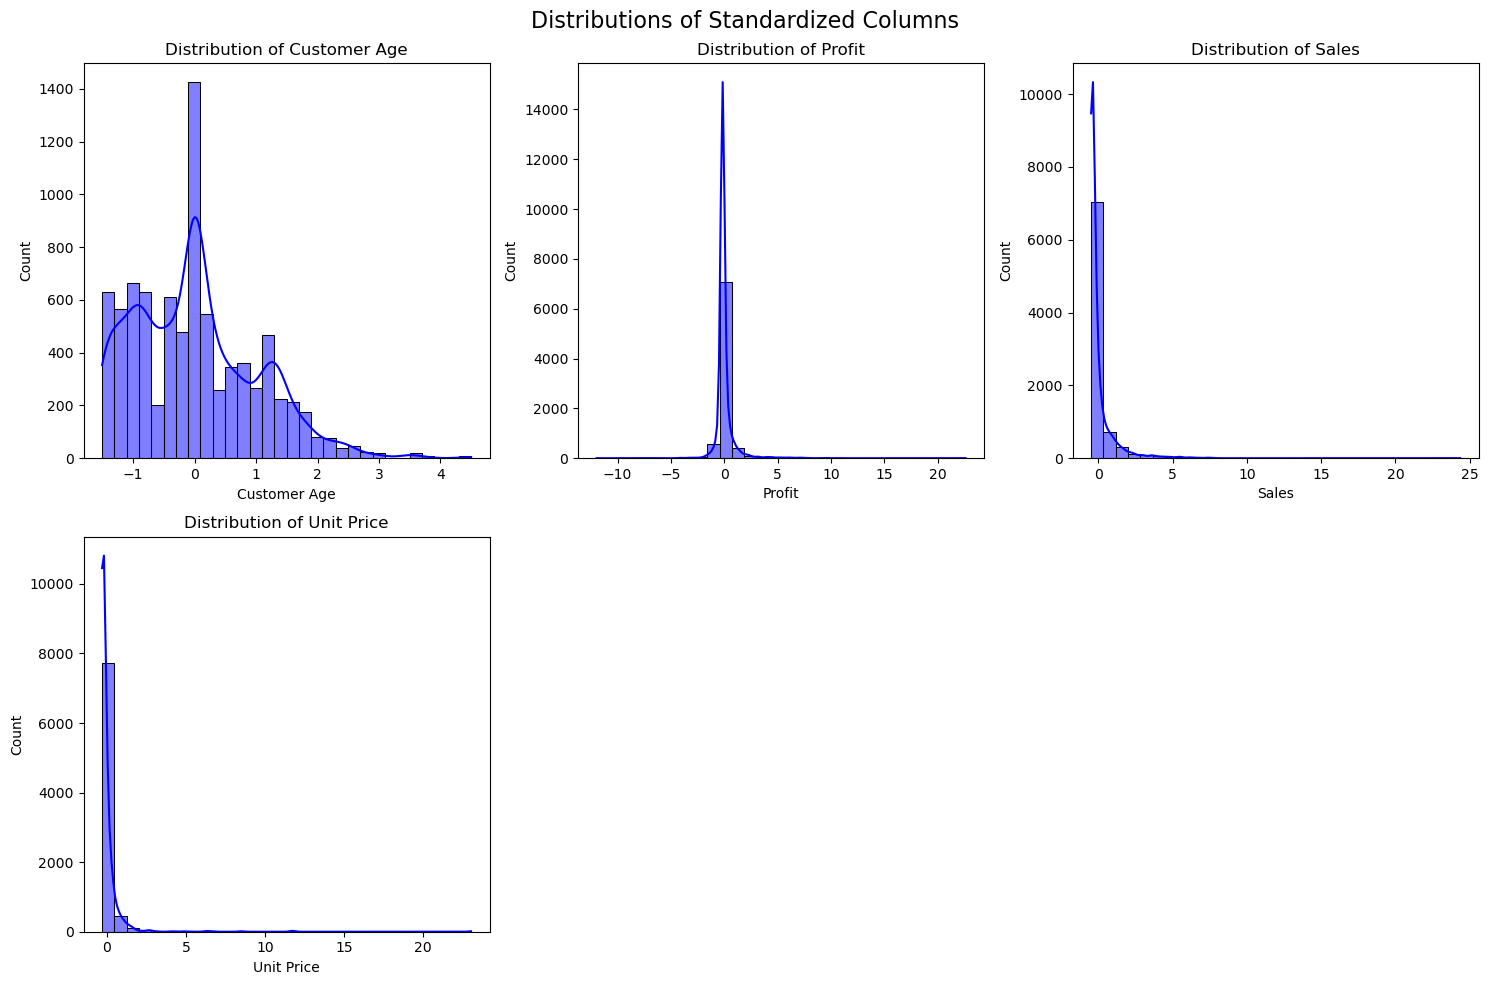

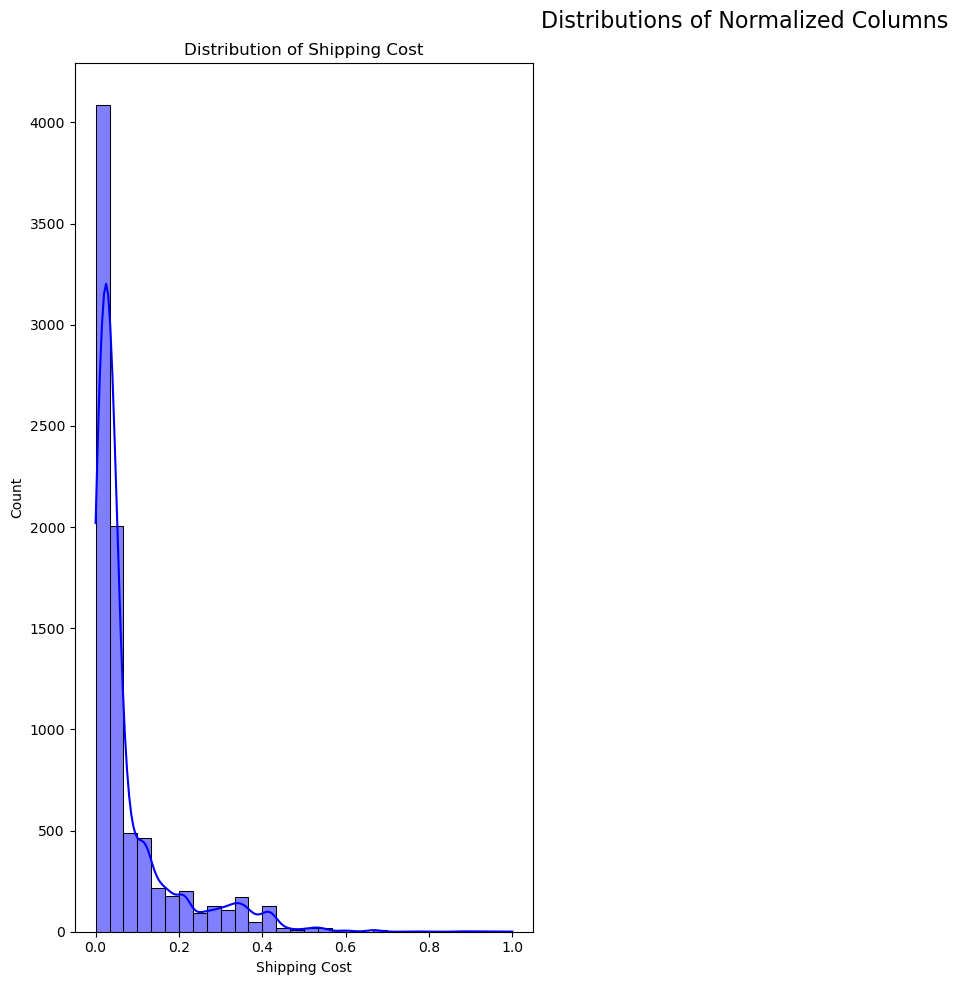

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize Distributions of Transformed Columns
def plot_distributions(data, columns, title):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns)//3 + 1, 3, i)
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {col}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize standardized columns
plot_distributions(data_scaled, columns_to_standardize, "Distributions of Standardized Columns")

# Visualize normalized columns
plot_distributions(data_scaled, columns_to_normalize, "Distributions of Normalized Columns")

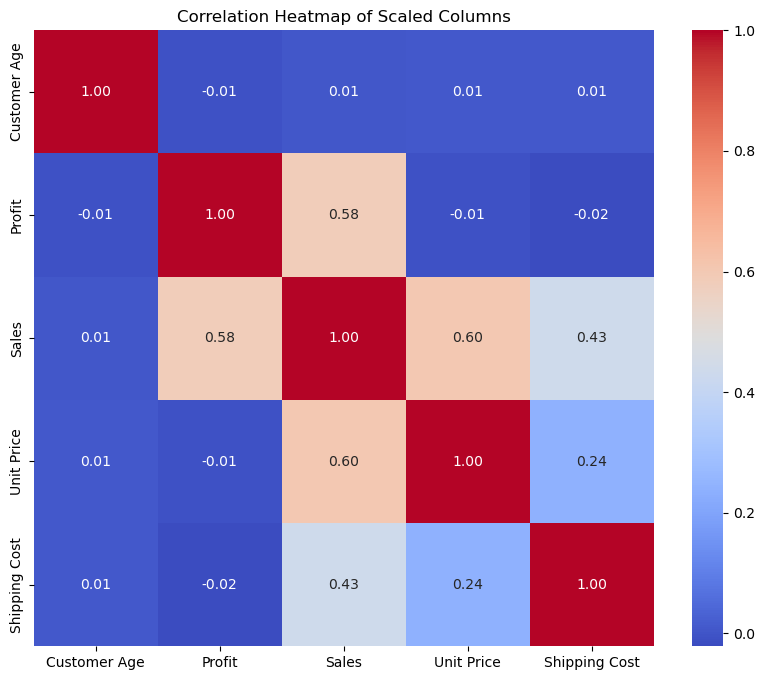

In [75]:
plt.figure(figsize=(10, 8))
corr_matrix = data_scaled[columns_to_standardize + columns_to_normalize].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Scaled Columns")
plt.show()

In [76]:
data

,City,Customer Age,Customer Name,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Product Container_Small Box,Product Container_Small Pack,Product Container_Wrap Bag,Region_Central,Region_East,Region_South,Region_West,Ship Mode_Delivery Truck,Ship Mode_Express Air,Ship Mode_Regular Air
0,McKeesport,0.000000,Jessica Myrick,0.10,1,2012-01-01,28774,2.0,32,0.680000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Bowie,0.000000,Matt Collister,0.08,1,2012-01-01,13729,2.0,9,0.512513,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Napa,0.000000,Alan Schoenberger,0.00,1,2012-01-02,37537,0.0,4,0.560000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Montebello,0.000000,Elizabeth Moffitt,0.08,1,2012-01-02,44069,3.0,43,0.390000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Napa,0.000000,Alan Schoenberger,0.07,1,2012-01-02,37537,0.0,43,0.690000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,4.498962,Tony Molinari,0.10,1,2015-12-30,50950,2.0,35,0.590000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8395,Harker Heights,4.498962,Matt Hagelstein,0.09,1,2015-12-30,25542,0.0,37,0.390000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8396,Riverview,4.498962,Theresa Swint,0.10,1,2015-12-30,45127,1.0,10,0.370000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8397,Nicholasville,4.498962,Maribeth Yedwab,0.09,1,2015-12-30,49344,0.0,1,0.830000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
